In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [17]:
dataset = pd.read_csv('Kruk_VLagun_156.csv')
print(dataset.shape)

(156, 30)


In [18]:
print(dataset.describe())

              PSU          O2   SecchDisc       temp.          SS        chla  \
count  156.000000  156.000000  156.000000  156.000000  156.000000  156.000000   
mean     3.356954   10.180705    0.376026   17.350000   86.937115   58.011474   
std      0.758865    1.078504    0.115147    3.122251   35.506823   33.122486   
min      1.400000    7.620000    0.200000   10.600000   29.000000    0.000000   
25%      2.800000    9.367500    0.300000   16.200000   60.000000   32.760000   
50%      3.379124    9.955000    0.350000   17.900000   80.000000   53.515000   
75%      3.957258   10.890000    0.450000   20.100000  111.562500   81.910000   
max      4.600000   12.890000    0.700000   20.700000  217.500000  170.370000   

              SRP         DOP          PP          TP  ...         DOC  \
count  156.000000  156.000000  156.000000  156.000000  ...  156.000000   
mean    15.034615   22.421154  134.547436  172.003205  ...    8.206301   
std     11.842344   19.531893   51.210224   51.6

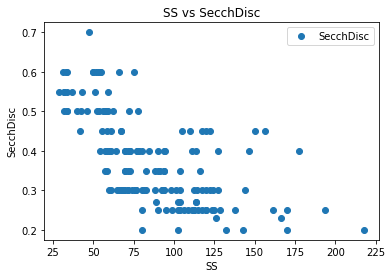

In [19]:
dataset.plot(x='SS', y='SecchDisc', style='o')
plt.title('SS vs SecchDisc')
plt.xlabel('SS')
plt.ylabel('SecchDisc')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


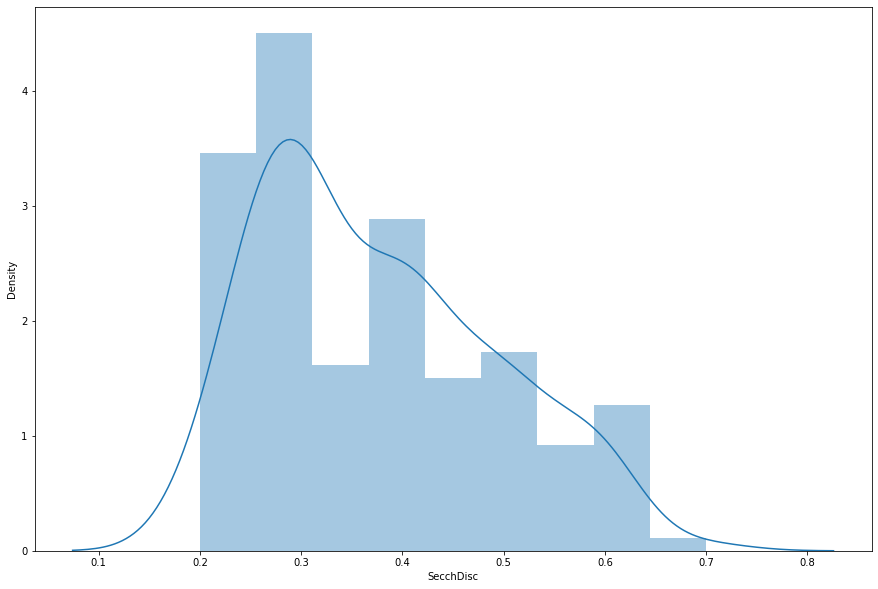

In [20]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['SecchDisc'])
plt.show()

In [21]:
X = dataset['SS'].values.reshape(-1,1)
Y = dataset['SecchDisc'].values.reshape(-1,1)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [23]:
regressor =  LinearRegression()
regressor.fit(X_train, Y_train)
print(regressor.intercept_)
print(regressor.coef_)

[0.55338577]
[[-0.00201303]]


In [24]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.50,0.397376
1,0.30,0.400979
2,0.40,0.432604
3,0.23,0.218720
4,0.70,0.457767
5,0.50,0.436630
6,0.30,0.409595
7,0.20,0.347050
8,0.30,0.420023
9,0.40,0.383708


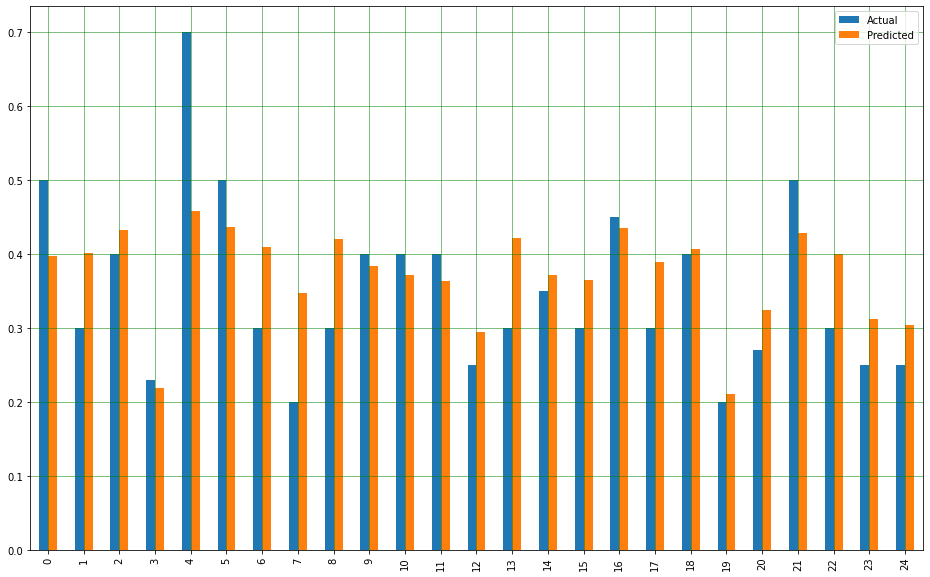

In [25]:
df1 = df.head(25)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5',color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

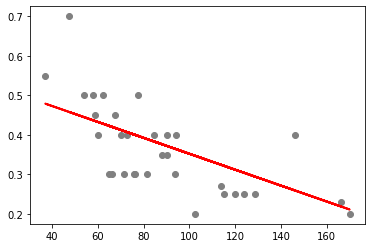

In [26]:
plt.scatter(X_test, Y_test, color="gray")
plt.plot(X_test, y_pred, color="red", linewidth=2)
plt.show()

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.06680798903466384
Mean Squared Error: 0.00702853326805623
Root Mean Squared Error: 0.08383634813167991
